Цифровые платежи развиваются, но киберпреступники тоже.

Согласно индексу утечек данных, ежедневно крадут более 5 миллионов записей, и это тревожная статистика, которая показывает, что мошенничество по-прежнему очень распространено как для платежей с предъявлением карты, так и для платежей без предъявления карты.

В современном цифровом мире, где ежедневно совершаются триллионы транзакций по картам, обнаружение мошенничества является сложной задачей.

В этой задаче необходим найти решение для обнаруждения мошенических транзакций.
В наборе данных представленна информация о миллионе различных транзакций. 
В наборе 8 атрибутов:

Distance_from_home — расстояние от дома, где произошла транзакция.

Distance_from_last_transaction - расстояние от последней транзакции.

ratio_to_median_purchase_price — отношение цены покупки к медианной цене покупки.

repeat_retailer — транзакция произошла от одного и того же продавца.

used_chip — это транзакция через чип (кредитную карту).

used_pin_number - Произошла ли транзакция с использованием PIN-кода.

online_order — является ли транзакция онлайн-заказом.

fraud - Является ли транзакция мошеннической.

In [1]:
from data_treat.get_ready_data import get_data, get_data_for_analiz
import pandas as pd
import matplotlib.pyplot as plt
from data_treat.data_normalizer import CustomNormalizer
from data_treat.util_class import ThreeQRule


In [2]:
COLUMNS = ["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price",
           "repeat_retailer","used_chip","used_pin_number","online_order","fraud"]

In [3]:
data = get_data_for_analiz()


In [4]:
#data = get_data()

Общее описание данных

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


При мошенничестве

In [7]:
data[data["fraud"] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,87403.0,66.261876,134.391608,0.025847,4.585729,15.454219,101.110104,10632.723672
distance_from_last_transaction,87403.0,12.712185,47.997697,0.000407,0.328199,1.157631,4.598504,2160.499922
ratio_to_median_purchase_price,87403.0,6.006323,5.564320,0.011966,3.500270,5.071294,7.331222,266.689692
repeat_retailer,87403.0,0.880119,0.324825,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,87403.0,0.256399,0.436647,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,87403.0,0.003123,0.055801,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,87403.0,0.946318,0.225391,0.000000,1.000000,1.000000,1.000000,1.000000
fraud,87403.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Не при мошенничестве

In [8]:
data[data["fraud"] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,912597.0,22.832976,52.828655,0.004874,3.828942,9.673847,24.158057,8777.136420
distance_from_last_transaction,912597.0,4.301391,22.472359,0.000118,0.293859,0.985074,3.268578,11851.104565
ratio_to_median_purchase_price,912597.0,1.423642,1.946152,0.004399,0.449768,0.913950,1.788918,267.802942
repeat_retailer,912597.0,0.881672,0.322997,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,912597.0,0.359402,0.479825,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,912597.0,0.109944,0.312821,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,912597.0,0.622225,0.484831,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,912597.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Убираем данные за пределами 3-х стандартных отклонений

In [15]:
q3_data = ThreeQRule(data).get_data()

Не обработанные данные, при применении правила трёх отклонений

array([[<AxesSubplot:title={'center':'distance_from_home'}>,
        <AxesSubplot:title={'center':'distance_from_last_transaction'}>,
        <AxesSubplot:title={'center':'ratio_to_median_purchase_price'}>],
       [<AxesSubplot:title={'center':'repeat_retailer'}>,
        <AxesSubplot:title={'center':'used_chip'}>,
        <AxesSubplot:title={'center':'used_pin_number'}>],
       [<AxesSubplot:title={'center':'online_order'}>,
        <AxesSubplot:title={'center':'fraud'}>, <AxesSubplot:>]],
      dtype=object)

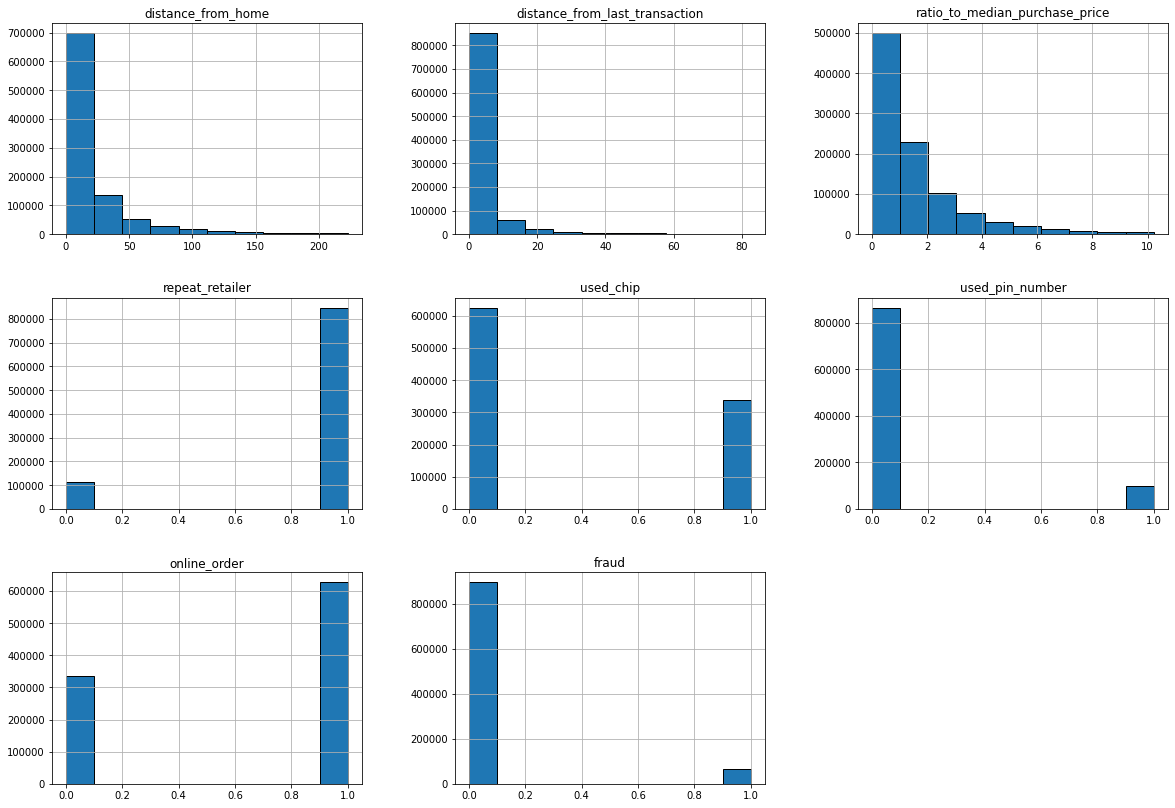

In [19]:
q3_data.hist(figsize=(20,14), edgecolor="black")

Правила трёх отклонений + кейсы где произошло мошенничество

array([[<AxesSubplot:title={'center':'distance_from_home'}>,
        <AxesSubplot:title={'center':'distance_from_last_transaction'}>,
        <AxesSubplot:title={'center':'ratio_to_median_purchase_price'}>],
       [<AxesSubplot:title={'center':'repeat_retailer'}>,
        <AxesSubplot:title={'center':'used_chip'}>,
        <AxesSubplot:title={'center':'used_pin_number'}>],
       [<AxesSubplot:title={'center':'online_order'}>,
        <AxesSubplot:title={'center':'fraud'}>, <AxesSubplot:>]],
      dtype=object)

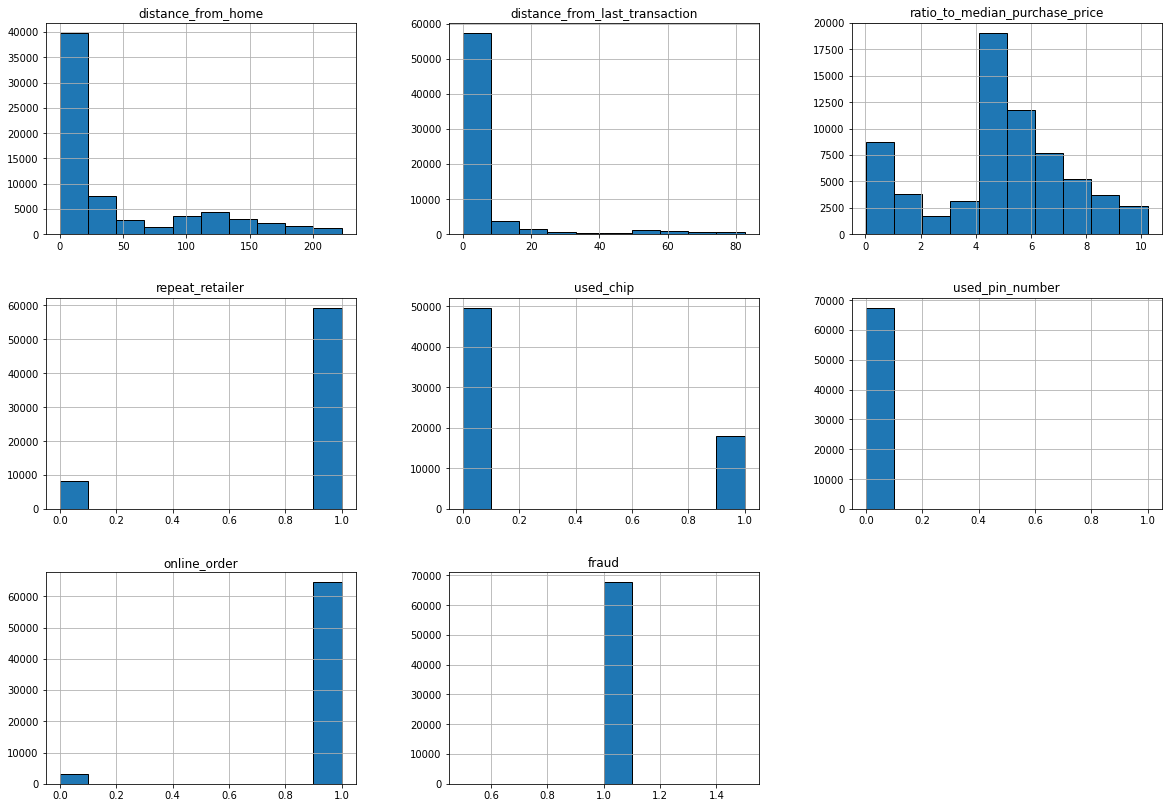

In [10]:
q3_data[q3_data["fraud"] == 1].hist(figsize=(20,14), edgecolor="black")

Правило трёх отклонений + кейсы где не было мошенничества

array([[<AxesSubplot:title={'center':'distance_from_home'}>,
        <AxesSubplot:title={'center':'distance_from_last_transaction'}>,
        <AxesSubplot:title={'center':'ratio_to_median_purchase_price'}>],
       [<AxesSubplot:title={'center':'repeat_retailer'}>,
        <AxesSubplot:title={'center':'used_chip'}>,
        <AxesSubplot:title={'center':'used_pin_number'}>],
       [<AxesSubplot:title={'center':'online_order'}>,
        <AxesSubplot:title={'center':'fraud'}>, <AxesSubplot:>]],
      dtype=object)

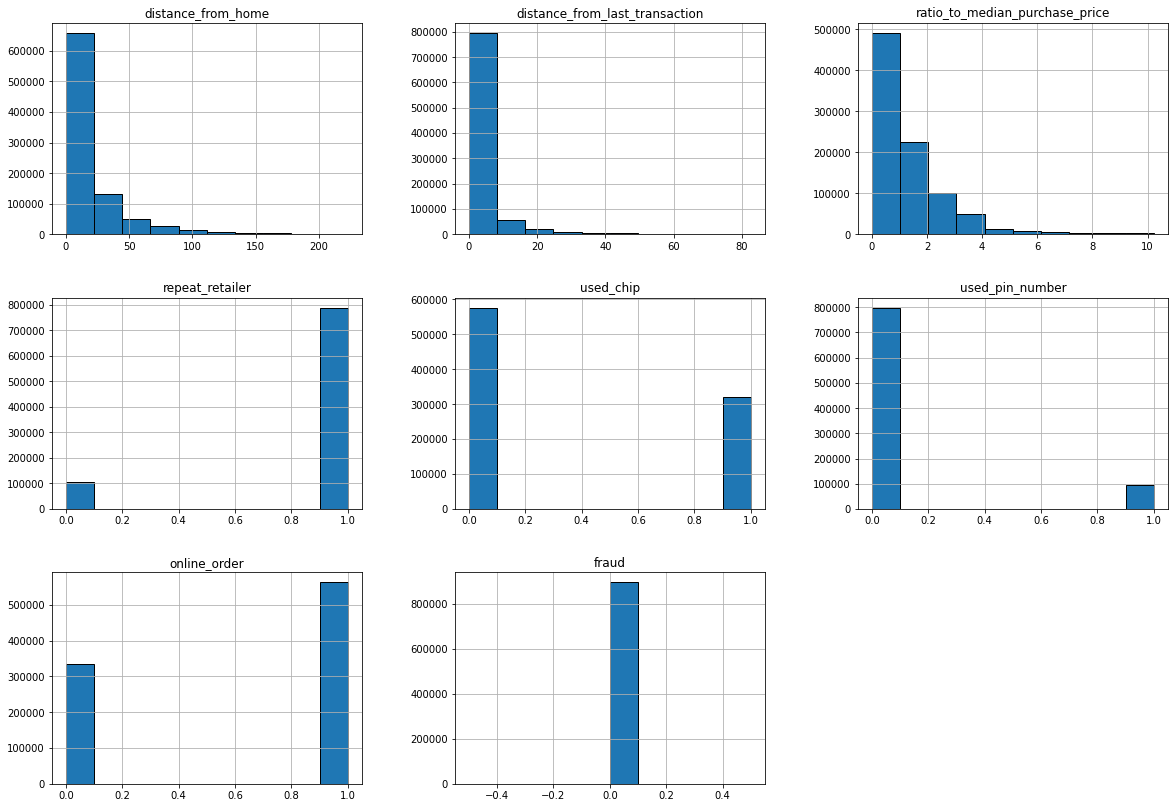

In [11]:
q3_data[q3_data["fraud"] == 0].hist(figsize=(20,14), edgecolor="black")

По визуальному анализу данных можно сделать вывод: <br>
    1) что в случае мошенничество чаще покупка происходит дальше от места жительства человека, чем если бы он сам совершал транзакцию<br>
    2)Расстояние от последней транзакции, не являются определяющим фактором, но в случае мошенничества, оно в среднем не много больше<br>
    3)Самую важную роль играет атрибут "Отношение цены покупки к медианной цене покупки(в переводе с Ratio of purchased price transaction to median purchase price.)". Это показывает, что при мошенничестве, в среднем цена покупки больше.<br>
    4)Аттрибут repeat_retailer имеет очень малое влияние, как и used_chip, так как в среднем в обоих слуаях значения оченб похожи.<br>
    5)Видно, что при мошенничестве почти всегда используется номер pin. В то время как при честной транзакции есть случаи где pin не понадобился.<br>
    6)Так же можно заметить что при мошеничестве почти всегда совершаются покупки через онлайн. А при честной транзакции ситуация более ровная.<br>